# Text2Human unofficial Colab

Original: [yumingj/Text2Human](https://github.com/yumingj/Text2Human)

Some code taken from [Text2Human HF Space](https://huggingface.co/spaces/CVPR/Text2Human)

# Setup

In [1]:
#@title Install dependencies
!pip install mmcv-full==1.2.1 -f https://download.openmmlab.com/mmcv/dist/cu101/torch1.7.0/index.html
!pip install sentence-transformers tokenizers==0.9.4 transformers==4.0.0 lpips einops mmsegmentation==0.9.0 torch==1.7.1 huggingface_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu101/torch1.7.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.3/251.3 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 16.3 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for mmcv-full
  Running setup.py clean for mmcv-full
Failed to build mmcv-full
ERROR: Could not build wheels for mmcv-full, which is required to install pyproject.toml-based projects
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 4.0 M

In [4]:
!pip install mmcv-full

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.4/605.4 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached addict-2.4.0-py3-none-any.whl (3.8 kB)
  Using cached yapf-0.33.0-py2.py3-none-any.whl (200 kB)
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 417, in run
    _, build_failures = build(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/wheel_builder.py", line 320, in build
    wheel_file = _build_one(
  File "/usr/local/lib/python3.10/dist-packages/pi

In [5]:
#@title Download Text2Human
!git clone https://github.com/yumingj/Text2Human

fatal: destination path 'Text2Human' already exists and is not an empty directory.


In [6]:
#@title Download patches
!wget -nc https://huggingface.co/spaces/hysts/Text2Human/raw/main/model.py
!wget -nc https://huggingface.co/spaces/hysts/Text2Human/raw/main/patch
!cd Text2Human && patch -p1 < ../patch

--2023-05-01 18:41:49--  https://huggingface.co/spaces/hysts/Text2Human/raw/main/model.py
Resolving huggingface.co (huggingface.co)... 13.249.85.69, 13.249.85.92, 13.249.85.127, ...
Connecting to huggingface.co (huggingface.co)|13.249.85.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4681 (4.6K) [text/plain]
Saving to: ‘model.py’

model.py            100%[===================>]   4.57K  --.-KB/s    in 0s      

2023-05-01 18:41:50 (812 MB/s) - ‘model.py’ saved [4681/4681]

--2023-05-01 18:41:50--  https://huggingface.co/spaces/hysts/Text2Human/raw/main/patch
Resolving huggingface.co (huggingface.co)... 13.249.85.69, 13.249.85.92, 13.249.85.127, ...
Connecting to huggingface.co (huggingface.co)|13.249.85.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7113 (6.9K) [text/plain]
Saving to: ‘patch’

patch               100%[===================>]   6.95K  --.-KB/s    in 0s      

2023-05-01 18:41:50 (1005 MB/s) - ‘patch’ saved [7113/7

In [7]:
#@title Download pretrained models
!gdown https://drive.google.com/uc?id=1VyI8_AbPwAUaZJPaPba8zxsFIWumlDen
!unzip -n -d pretrained_models pretrained_models.zip

Downloading...
From: https://drive.google.com/uc?id=1VyI8_AbPwAUaZJPaPba8zxsFIWumlDen
To: /content/pretrained_models.zip
100% 1.27G/1.27G [00:27<00:00, 46.4MB/s]
Archive:  pretrained_models.zip
  inflating: pretrained_models/index_pred_net.pth  
  inflating: pretrained_models/parsing_gen.pth  
  inflating: pretrained_models/parsing_token.pth  
  inflating: pretrained_models/sampler.pth  
  inflating: pretrained_models/vqvae_bottom.pth  
  inflating: pretrained_models/vqvae_top.pth  


In [9]:
!pip install huggingface_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 6.0 MB/s eta 0:00:00


In [19]:
!pip install mmcv==1.1.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.7/239.7 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached addict-2.4.0-py3-none-any.whl (3.8 kB)
  Using cached yapf-0.33.0-py2.py3-none-any.whl (200 kB)
  Created wheel for mmcv: filename=mmcv-1.1.4-cp310-cp310-linux_x86_64.whl size=449379 sha256=e83f673b1ba9cb4f5f95374959576be5d719f35bcb1c366ae68b406649a4873c
  Stored in directory: /root/.cache/pip/wheels/c4/05/94/de7ede8e72b69c1975aac75a44a1f033e7db63739ded7b0d33
Successfully built mmcv


In [21]:
!pip install mmsegmentation==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached mmsegmentation-0.9.0-py3-none-any.whl (134 kB)


In [23]:
!pip install einops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached einops-0.6.1-py3-none-any.whl (42 kB)


In [27]:
!pip install lpips sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached sentence-transformers-2.2.2.tar.gz (85 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 85.8 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=4c1fc53a377386ff03874a7aae16b306e598264bade242c1456b2aefe5a3096e
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [28]:
#@title Load modules
from IPython.display import display
from model import Model
from PIL import Image
import numpy as np
import random
import torch
import os

In [30]:
#@title Load model
device = "cuda" if torch.cuda.is_available() else "cpu"
model = Model()
print("Model loaded. Parameters:", sum(x.numel() for y in [model.model.shape_attr_embedder.parameters(), model.model.shape_parsing_encoder.parameters(), model.model.shape_parsing_decoder.parameters()
                                                   ] for x in y))

gpu_list:  3
Working with z of shape (1, 256, 32, 16) = 131072 dimensions.
Working with z of shape (1, 256, 64, 32) = 524288 dimensions.
Model loaded. Parameters: 31306128


In [31]:
#@title Patch PIL
from collections import namedtuple
Image.Resampling = namedtuple("Patch", ["LANCZOS"])(Image.LANCZOS)

# Usage

In [125]:
#@title Generation parameters
#@markdown Can be a URL or a file link (if you upload your own image)
pose_url = "https://huggingface.co/spaces/hysts/Text2Human/resolve/main/pose_images/003.png" #@param ["https://huggingface.co/spaces/hysts/Text2Human/resolve/main/pose_images/000.png", "https://huggingface.co/spaces/hysts/Text2Human/resolve/main/pose_images/001.png", "https://huggingface.co/spaces/hysts/Text2Human/resolve/main/pose_images/002.png", "https://huggingface.co/spaces/hysts/Text2Human/resolve/main/pose_images/003.png", "https://huggingface.co/spaces/hysts/Text2Human/resolve/main/pose_images/004.png", "https://huggingface.co/spaces/hysts/Text2Human/resolve/main/pose_images/005.png"] {allow-input: true}
pose_file = os.path.basename(pose_url)
if not os.path.exists(pose_url):  # If we passed a URL and not a local file
    !wget -c {pose_url} -O {pose_file}
pose_image = Image.open(pose_file)
#@markdown Shape text for the general shape, texture text for the color texture
shape_text = "A lady with a T-shirt and a pant"  #@param {type: "string"}
texture_text = "Lady wears a short-sleeve T-shirt with pure color pattern, and a long and denim pant."  #@param {type: "string"}
steps = 50  #@param {type: "slider", min: 10, max:300, step: 10}

seed = -1  #@param {type: "integer"}
if seed == -1:
    seed = random.getrandbits(16)
print("Seed:", seed)

--2023-05-01 21:14:52--  https://huggingface.co/spaces/hysts/Text2Human/resolve/main/pose_images/003.png
Resolving huggingface.co (huggingface.co)... 18.160.249.78, 18.160.249.9, 18.160.249.70, ...
Connecting to huggingface.co (huggingface.co)|18.160.249.78|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/85/aa/85aa3a51f698c81333b91aa7e6d4d10a8bee463c648707b18c33eabdd4492b9b/83f059e8281483a1c8848c9e190813f2e4eb56b0bfa866cf004e87f019ef4d2c?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27003.png%3B+filename%3D%22003.png%22%3B&response-content-type=image%2Fpng&Expires=1683233807&Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiaHR0cHM6Ly9jZG4tbGZzLmh1Z2dpbmdmYWNlLmNvL3JlcG9zLzg1L2FhLzg1YWEzYTUxZjY5OGM4MTMzM2I5MWFhN2U2ZDRkMTBhOGJlZTQ2M2M2NDg3MDdiMThjMzNlYWJkZDQ0OTJiOWIvODNmMDU5ZTgyODE0ODNhMWM4ODQ4YzllMTkwODEzZjJlNGViNTZiMGJmYTg2NmNmMDA0ZTg3ZjAxOWVmNGQyYz9yZXNwb25zZS1jb250ZW50LWRpc3Bvc2l0aW9uPSomcmVzcG9uc2UtY29ud

Pose image:


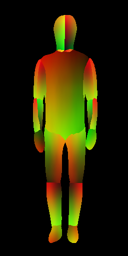

Shape description: A lady with a T-shirt and a pant
Label image:


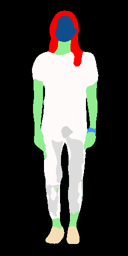

In [126]:
# %%time
#@title Generate label image
print("Pose image:")
display(pose_image.resize((128, 256)))
print("Shape description:", shape_text)
label_image = model.generate_label_image(
    pose_data=model.process_pose_image(pose_image),
    shape_text=shape_text)
print("Label image:")
display(Image.fromarray(label_image).resize((128, 256)))

Label mask:


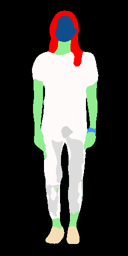

Texture text: Lady wears a short-sleeve T-shirt with pure color pattern, and a long and denim pant.
Generation steps: 50
Resulting image:


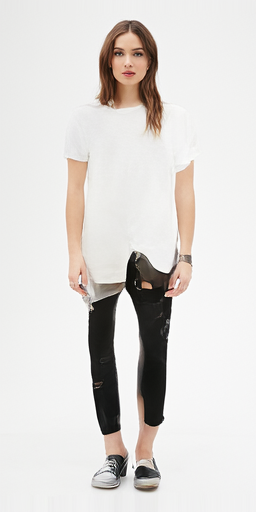

CPU times: user 2.44 s, sys: 2.22 ms, total: 2.45 s
Wall time: 2.48 s


In [127]:
%%time
#@title Generate human image
print("Label mask:")
display(Image.fromarray(label_image).resize((128, 256)))
print("Texture text:", texture_text)
print("Generation steps:", steps)
result = model.generate_human(label_image=label_image,
                              texture_text=texture_text,
                              sample_steps=steps,
                              seed=0)
print("Resulting image:")
display(Image.fromarray(result))

by @nev#4905